In [1]:
import pandas as pd
# !pip install fuzzywuzzy
from E_Salary_Cities import read,rename_columns,merge,clean_positions
from E_Position_YearsOfExperience import clean_position,clean_senior_col,clean_years
import re
import matplotlib.pyplot as plt

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# How the position (backend/ Machine learning..etc) affects the required years of experience needed in order to be an official senior?

#### We need to deal with columns:           
1-Position              
2-Years of Experience           
3-Seniority level           

In [2]:
POSITION = 'Position'
YEARS = 'Years of experience'
SENIORITY = 'Seniority level'

In [3]:
df2020,df2019,df2018 = read()
rename_columns(df2020,df2019,df2018)
common_cols = set(df2020.columns).intersection(df2019.columns).intersection(df2018.columns)
print(common_cols)
df = merge([df2018,df2019,df2020],common_cols)
df.info()

{'Company type', 'Age', 'Seniority level', 'City', 'Years of experience', 'Gender', 'Company size', 'Main language at work', 'Position', 'Salary'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company type           2918 non-null   object 
 1   Age                    2780 non-null   float64
 2   Seniority level        2960 non-null   object 
 3   City                   2980 non-null   object 
 4   Years of experience    2960 non-null   object 
 5   Gender                 2985 non-null   object 
 6   Company size           2962 non-null   object 
 7   Main language at work  2973 non-null   object 
 8   Position               2974 non-null   object 
 9   Salary                 2993 non-null   float64
dtypes: float64(2), object(8)
memory usage: 235.2+ KB


e:\University\Fourth year\second term\Data science\Data-Science-Project\Questions\E_Salary_Cities.py:43: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat(data_frames, ignore_index=True)[common_columns]


In [4]:
df = df[[POSITION,SENIORITY,YEARS]]
df = df.dropna()                    #There are missings that need to be imputed :(
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 3008
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Position             2918 non-null   object
 1   Seniority level      2918 non-null   object
 2   Years of experience  2918 non-null   object
dtypes: object(3)
memory usage: 91.2+ KB


#### Exploring position column

# Expectaions :
To have aronud 10-15 different position

In [5]:
print(df[POSITION].nunique())

511


#### Collected data
we have 511 different position

#### Comparing Expectation with Collection:
Not matching.The number of uniqe positions is huge, it needs cleaning.                       
Let's unify similar positions to the same category

In [6]:
df = clean_positions(df)
print(df[POSITION].unique())
df.info()

['Other' 'backend developer' 'software engineer' 'frontend developer'
 'product manager' 'mobile developer' 'qa engineer' 'devops'
 'fullstack developer' 'ai engineer' 'security engineer'
 'designer (ui/ux)' 'researcher']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 3008
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Position             2918 non-null   object
 1   Seniority level      2918 non-null   object
 2   Years of experience  2918 non-null   object
dtypes: object(3)
memory usage: 155.7+ KB


#### Now Expectations meets collected data

In [7]:
print(df[POSITION].value_counts())

backend developer      607
software engineer      543
Other                  461
ai engineer            446
frontend developer     185
qa engineer            165
mobile developer       159
devops                 147
fullstack developer     95
product manager         71
designer (ui/ux)        20
researcher              14
security engineer        5
Name: Position, dtype: int64


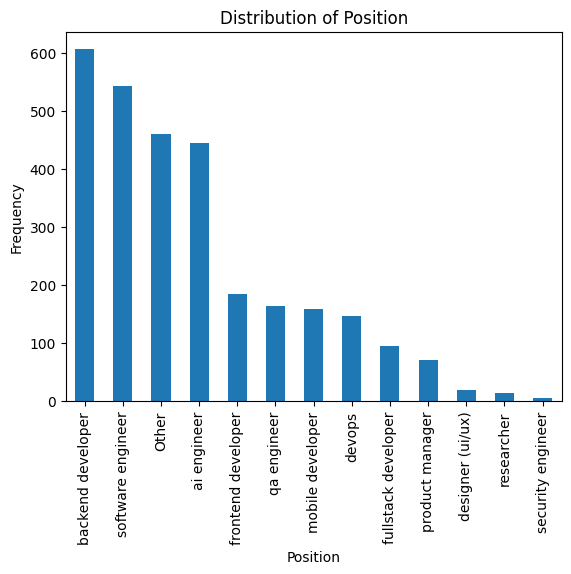

In [8]:
# count the frequency of each category
pos_counts = df[POSITION].value_counts()
# plot bar chart
pos_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Distribution of Position')
plt.show()

### Exploring Years of Experience column

#### Expectations:
To have only numerical values with ranges from 0-40 at max.

In [9]:
print("There are ",df[YEARS].nunique(),"unique value in Years of Experience column")
print("The unique values are",df[YEARS].unique())

There are  80 unique value in Years of Experience column
The unique values are [11.0 8.0 10.0 6.0 5.0 3.0 18.0 4.0 17.0 19.0 15.0 12.0 2.0 1.0 9.0 7.0
 20.0 7.5 14.0 13.0 0.5 2.5 1.5 16.0 0.0 25.0 30.0 21.0 4.5 22 24 28 '5'
 '7' '12' '4' '17' '6' '8' '15' '2' '25' '14' '11' '18' '13' '30' '10' '3'
 '40' '26' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '6.5' '21' '7.5'
 '2.5' '28' '29' '23' '1,5' '24' '0' '4.5' '27'
 '1 (as QA Engineer) / 11 in total' '2,5' '15, thereof 8 as CTO' '31'
 '6 (not as a data scientist, but as a lab scientist)' '383' '3.5'
 'less than year']


#### Collection data :
It shows that we have text in the years column ,out of range values (343) ,mis-written values(1,5 instead of 1.5)

#### Comparison:
Not Matching. Cleaning is needed

In [10]:
df = clean_years(df)
print(df[YEARS].unique())

[11.   8.  10.   6.   5.   3.  18.   4.  17.  19.  15.  12.   2.   1.
  9.   7.  20.   7.5 14.  13.   0.5  2.5  1.5 16.   0.  25.  30.  21.
  4.5 22.  24.  28.  40.  26.   5.5  0.8  6.5 29.  23.  27.  31.   3.5]


#### Now expectaions meets our results

In [11]:
df[YEARS] = df[YEARS].astype('float64')
print(df[YEARS].head(5))

0    11.0
1     8.0
2    10.0
3     6.0
4    10.0
Name: Years of experience, dtype: float64


#### Exploring range of available years of experience and visualizing it

In [12]:
mean_years = df[YEARS].mean()
median_years = df[YEARS].median()
std_years = df[YEARS].std()
max_years = df[YEARS].max()
min_years = df[YEARS].min()

# display the computed statistics
print('Mean years: ',mean_years)
print('Median years: ', median_years)
print('Standard deviation of years: ', std_years)
print('Max years: ', max_years)
print('Min years: ', min_years)

Mean years:  8.613810829335161
Median years:  8.0
Standard deviation of years:  5.033383018279054
Max years:  40.0
Min years:  0.0


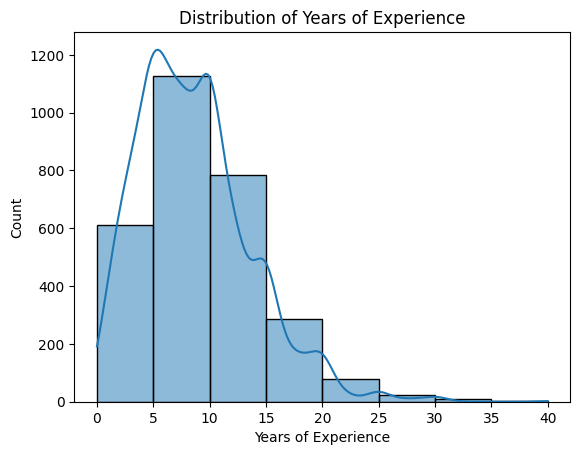

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df[YEARS], kde=True, binwidth=5)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

1-Expectation :
I thins the mean will be around 10-15 years of experience, is the IT field has started growing in the last 15 years.

2-After collecting:
It's clear that the data mean of years of experience is between 5-10 years. 

3-Comparing Data and expectations:
not exact but close to what is expected. ✔

#### Visualizing distribution of years of experience in different positions

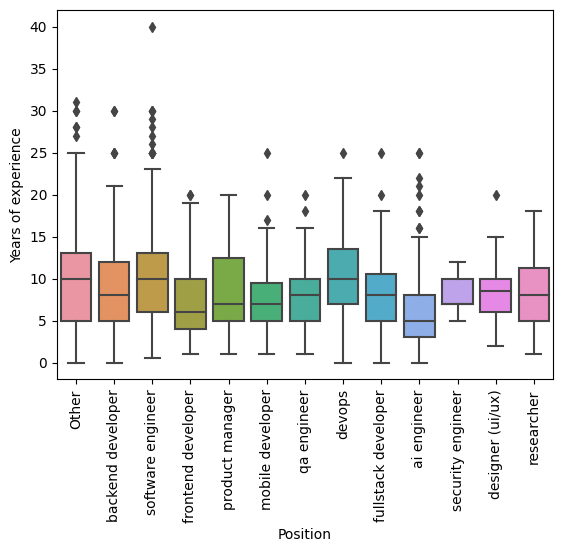

In [14]:
import numpy as np
import matplotlib.pyplot as plt

sns.boxplot(x=POSITION, y=YEARS, data=df)
plt.xticks(rotation=90)
plt.show()

#### Numerically exploring the distribution of years of experience 

In [15]:
for position in df[POSITION].unique():
    mean_years = df[df[POSITION] == position][YEARS].mean()
    median_years = df[df[POSITION] == position][YEARS].median()
    std_years = df[df[POSITION] == position][YEARS].std()
    # display the computed statistics
    print('Mean years for',position,'is :',mean_years)


Mean years for Other is : 9.837310195227765
Mean years for backend developer is : 8.941186161449753
Mean years for software engineer is : 10.164825046040516
Mean years for frontend developer is : 6.962162162162162
Mean years for product manager is : 8.732394366197184
Mean years for mobile developer is : 7.663522012578617
Mean years for qa engineer is : 7.793939393939394
Mean years for devops is : 10.129251700680273
Mean years for fullstack developer is : 8.43157894736842
Mean years for ai engineer is : 5.8762331838565025
Mean years for security engineer is : 8.2
Mean years for designer (ui/ux) is : 8.65
Mean years for researcher is : 8.285714285714286


Now we will filter on Seniority level, to focus on the needed years of experience for the seniors only

In [16]:
print(df[SENIORITY].unique()) 

['Senior' 'Middle' 'Junior' 'Head' 'Lead' 'Principal' 'No level' 'VP'
 'Manager' 'Work Center Manager' 'CTO' 'No level ' 'Director' 'Key'
 'C-level executive manager' 'intern' 'Student'
 'no idea, there are no ranges in the firm ' 'C-Level' 'Working Student'
 'Entry level' 'Intern' 'student' 'Self employed']


#### Needs cleaning to be 4 levels only:     
Senior           
Mid level           
Junior          
Head

In [17]:
df = clean_senior_col(df)
print(len(df[SENIORITY]))
print(df[SENIORITY].unique())

2914
['senior' 'middle' 'junior' 'head']


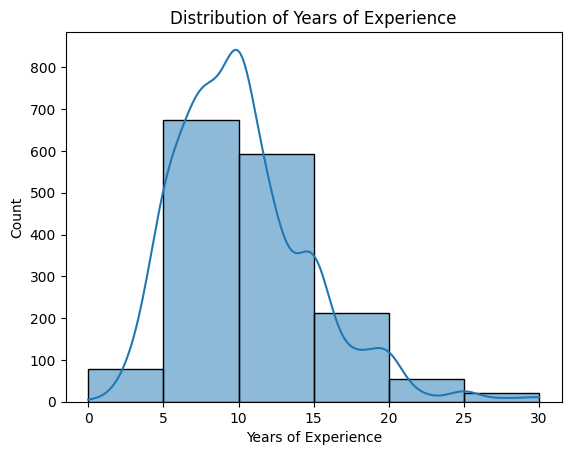

In [18]:
sns.histplot(data=df[df[SENIORITY] == 'senior'][YEARS], kde=True, binwidth=5)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

The histogram shows that to be a senior, regardless of field/position most of them it needs at least 10 years

Let's explore more for the needed years per position

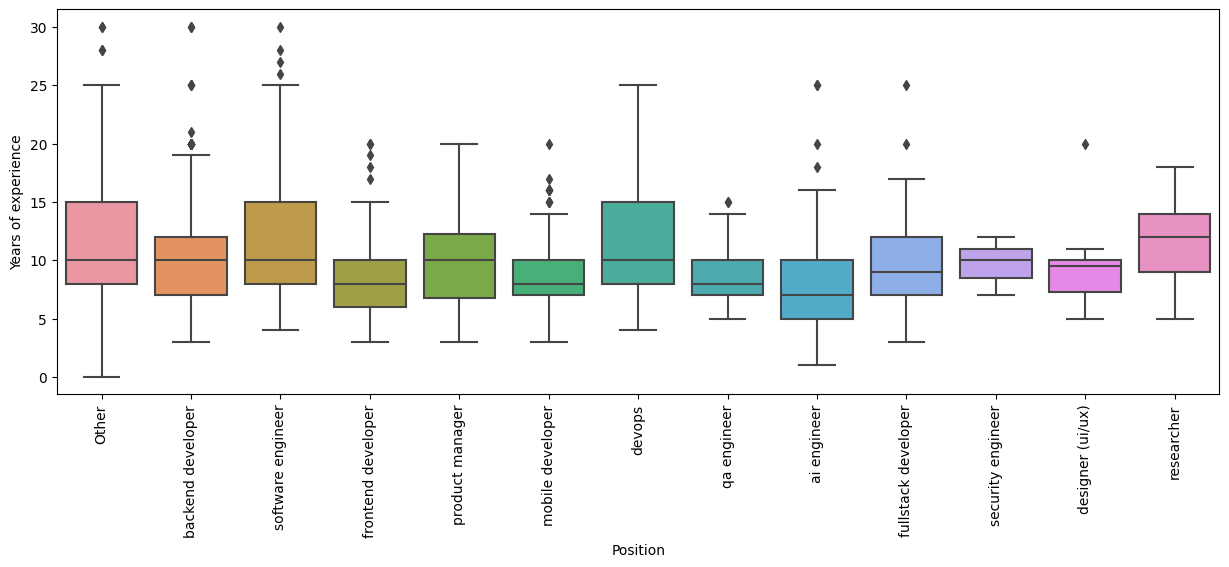

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.boxplot(x=POSITION, y=YEARS, data=df[df[SENIORITY] == 'senior'])
plt.xticks(rotation=90)
plt.show()

We can see that there is disparity in the needed years fo expereince to become a senior in each position,                                                                                               
                                                                            
For example, the average needed years for the QA is around 5-6 years,Unlike for the researcher position
where you need at least 8-9 years and on average it around 12 years! That's interesting.   
                                                                                                         
We can categorize the positions into two types .                    
1- 10-15 Needed years which includes :[ SW ,BE, DevOps, Product Manager, Others, CTO,IT,Researcher,Embedded ]                   
2- 5-10 Needed years which includes : [FE, UI/UX designer, Mobile Development, Data Scientist, Software Testing, ML, QA]                


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# define null and alternative hypotheses
# we assume alpha = 0.05
null_hypothesis = 'There is no significant difference in the means of years of experience across positions'
alternative_hypothesis = 'There is a significant difference in the means of years of experience across positions'

In [21]:
# perform one-way ANOVA test
seniors_df = df[df[SENIORITY] == 'senior']
model = ols('Q("Years of experience")~Position', data=seniors_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# print ANOVA table
print(anova_table)

# interpret p-value
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print('Reject null hypothesis. ' + alternative_hypothesis)
else:
    print('Cannot reject null hypothesis. ' + null_hypothesis)

                sum_sq      df          F        PR(>F)
Position   2757.050046    12.0  12.498375  9.858017e-25
Residual  29780.012110  1620.0        NaN           NaN
Reject null hypothesis. There is a significant difference in the means of years of experience across positions
